In [1]:
import pickle
import numpy as np
from sklearn.ensemble import RandomForestClassifier as rf
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from collections import Counter

In [2]:
data_dict = pickle.load(open('./Data.pickle','rb'))

In [3]:
for key, value in data_dict.items():
    if isinstance(value, list) and len(value) > 0 and isinstance(value[0], (list, tuple)):
        shape = (len(value), len(value[0]))
    elif isinstance(value, list):
        shape = (len(value),)
    else:
        shape = 'Unknown'

    print(f"Shape of {key}: {shape}")

Shape of data: (17626, 42)
Shape of labels: (17626,)


In [4]:
# Determine the most common shape
shapes = [np.shape(item) for item in data_dict['data']]
most_common_shape = Counter(shapes).most_common(1)[0][0]

# Filter out elements that do not match the most common shape
filtered_data = [item for item in data_dict['data'] if np.shape(item) == most_common_shape]
filtered_labels = [label for item, label in zip(data_dict['data'], data_dict['labels']) if np.shape(item) == most_common_shape]

# Convert to numpy arrays
data = np.asarray(filtered_data)
labels = np.asarray(filtered_labels)

print("Shape of data:", data.shape)
print("Shape of labels:", labels.shape)

Shape of data: (17608, 42)
Shape of labels: (17608,)


In [5]:
data[0]

array([0.30225134, 0.58153975, 0.37217855, 0.54061604, 0.43147963,
       0.44658306, 0.4593364 , 0.36634946, 0.47078013, 0.29691952,
       0.39759925, 0.38573191, 0.42479789, 0.34262136, 0.40229455,
       0.41247612, 0.38452703, 0.46271616, 0.35316372, 0.37527308,
       0.38395742, 0.33450475, 0.36146811, 0.41891208, 0.3462199 ,
       0.47566348, 0.30832675, 0.37360981, 0.33585805, 0.34026727,
       0.32496807, 0.42792314, 0.31852818, 0.48332801, 0.26287895,
       0.37718168, 0.28994307, 0.35056117, 0.29367331, 0.41733563,
       0.29403645, 0.46055326])

In [6]:
x_train,x_test,y_train,y_test = train_test_split(data,labels,test_size=0.2,shuffle=True,stratify=labels)

In [7]:
model = rf()

In [8]:
model.fit(x_train,y_train)

RandomForestClassifier()

In [9]:
y_pred = model.predict(x_test)

In [10]:
svm = SVC()

In [11]:
svm.fit(x_train,y_train)

SVC()

In [12]:
y_svm = svm.predict(x_test)

In [13]:
knn = KNN()

In [14]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [15]:
y_knn = knn.predict(x_test)

In [16]:
acc2 = accuracy_score(y_svm,y_test)

In [17]:
acc = accuracy_score(y_pred,y_test)

In [18]:
acc3 = accuracy_score(y_knn,y_test)

In [19]:
print("The accuracy of our Random Forest Classifier is {}%".format(acc*100))

The accuracy of our Random Forest Classifier is 99.54571266325951%


In [20]:
print(acc2)
print(acc3)

0.9894946053378763
0.9889267461669506


[[ 99   0   1 ...   0   0   0]
 [  0  95   0 ...   0   0   0]
 [  0   0  97 ...   0   0   0]
 ...
 [  0   0   0 ...  97   0   0]
 [  0   0   0 ...   0 100   0]
 [  0   0   0 ...   0   0 100]]


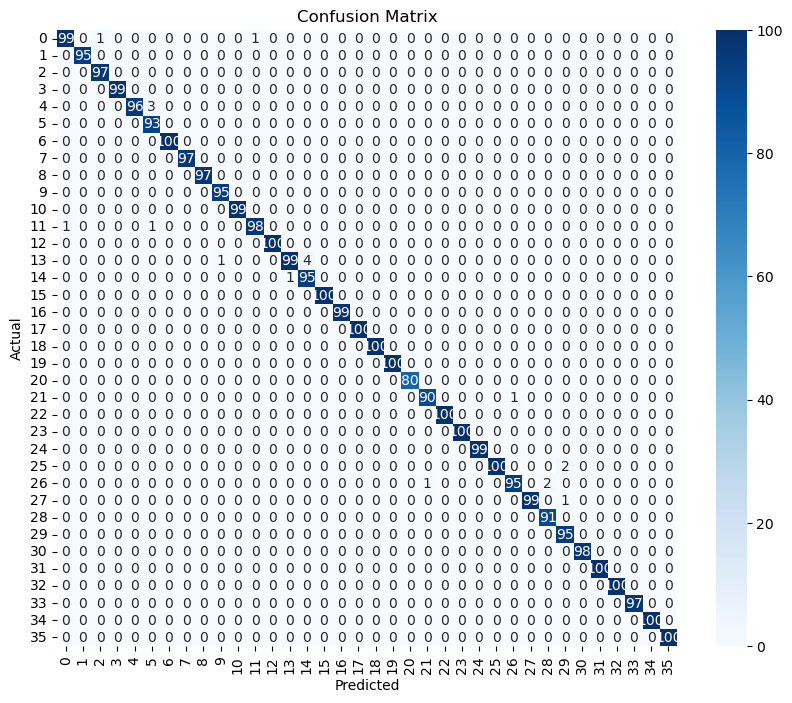

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
cm = confusion_matrix(y_pred,y_test)
print(cm)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

[[ 94   0   0 ...   0   0   0]
 [  0  95   0 ...   0   0   0]
 [  0   0  98 ...   0   0   0]
 ...
 [  0   0   0 ...  97   0   0]
 [  0   0   0 ...   0 100   0]
 [  0   0   0 ...   0   0 100]]


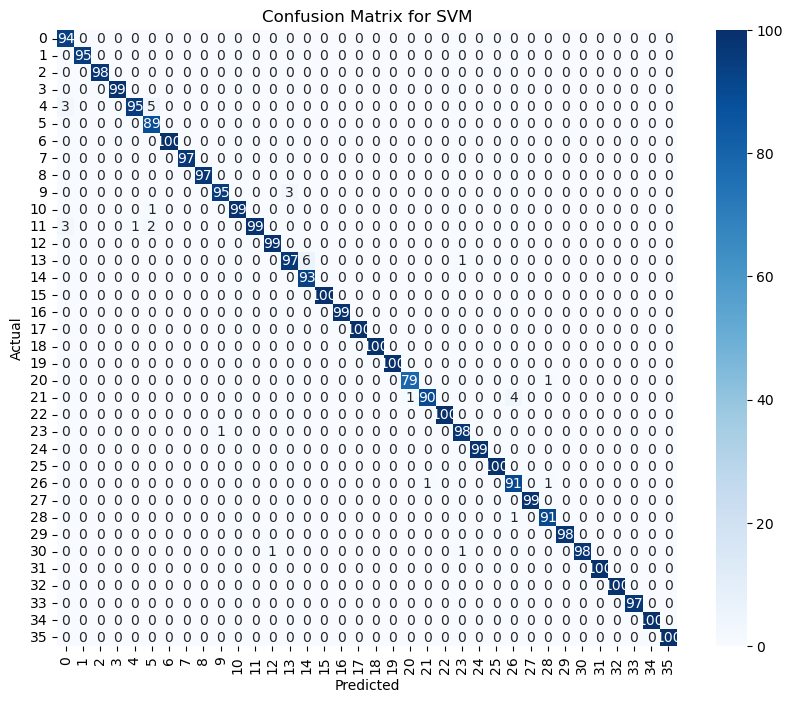

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
cm = confusion_matrix(y_svm,y_test)
print(cm)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for SVM')
plt.show()

[[ 97   0   0 ...   0   0   0]
 [  0  95   0 ...   0   0   0]
 [  0   0  98 ...   0   0   0]
 ...
 [  0   0   0 ...  96   0   0]
 [  0   0   0 ...   0 100   0]
 [  0   0   0 ...   0   0 100]]


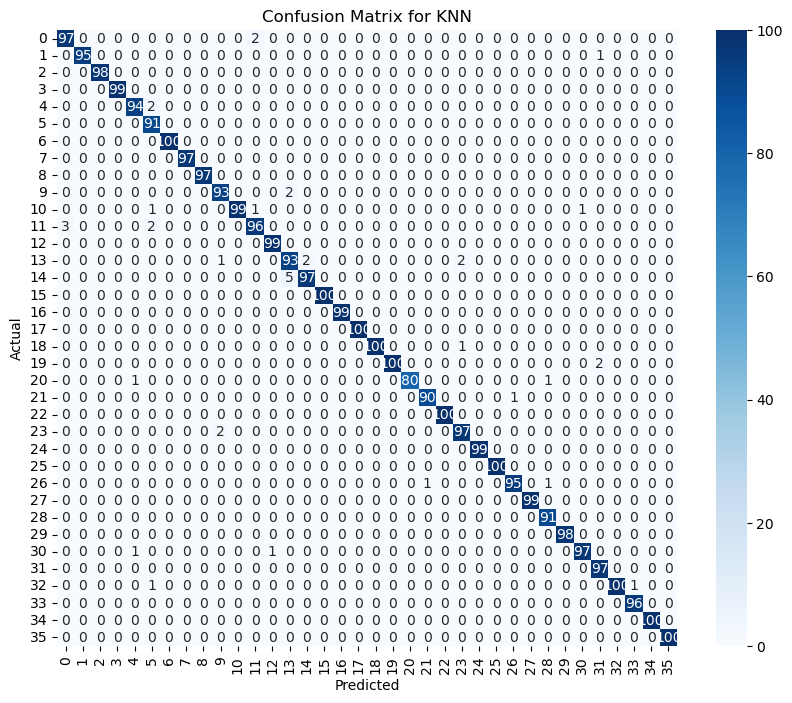

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
cm = confusion_matrix(y_knn,y_test)
print(cm)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for KNN')
plt.show()

In [25]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      0.98      0.99        97
          10       1.00      1.00      1.00        98
          11       1.00      1.00      1.00        99
          12       1.00      1.00      1.00        96
          13       0.98      1.00      0.99        95
          14       1.00      0.99      1.00       101
          15       1.00      1.00      1.00        97
          16       1.00      1.00      1.00        97
          17       0.98      0.99      0.98        95
          18       1.00      1.00      1.00        99
          19       1.00      1.00      1.00        99
           2       1.00      1.00      1.00       100
          20       0.97      0.96      0.97       101
          21       0.97      0.97      0.97        99
          22       1.00      1.00      1.00       100
          23       1.00      1.00      1.00        99
          24       1.00    

In [26]:
print("The accuracy of our Support Vector Classifier is {}%".format(acc2*100))

The accuracy of our Support Vector Classifier is 98.94946053378763%


In [27]:
print("The accuracy of our KNN is {}%".format(acc3*100))

The accuracy of our KNN is 98.89267461669506%


In [32]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculating recall
recall = recall_score(y_test, y_pred, average='micro')

# Calculating precision
precision = precision_score(y_test, y_pred, average='micro')

# Calculating F1 score
f1 = f1_score(y_test, y_pred, average='micro')

print(f'Accuracy: {accuracy}')
print(f'Recall: {recall}')
print(f'Precision: {precision}')
print(f'F1 Score: {f1}')

Accuracy: 0.9954571266325951
Recall: 0.9954571266325951
Precision: 0.9954571266325951
F1 Score: 0.9954571266325951


In [33]:
# Calculating accuracy
accuracy1 = accuracy_score(y_test, y_svm)

# Calculating recall
recall1 = recall_score(y_test, y_svm, average='micro')

# Calculating precision
precision1 = precision_score(y_test, y_svm, average='micro')

# Calculating F1 score
f11 = f1_score(y_test, y_svm, average='micro')

print(f'Accuracy: {accuracy1}')
print(f'Recall: {recall1}')
print(f'Precision: {precision1}')
print(f'F1 Score: {f11}')

Accuracy: 0.9894946053378763
Recall: 0.9894946053378763
Precision: 0.9894946053378763
F1 Score: 0.9894946053378763


In [37]:
f = open('model.p','wb')
pickle.dump({'model':model},f)
f.close()